In [22]:
import Pkg; Pkg.activate("..")

using DigitalMusicology
include("../src/Polygrams.jl")
include("../src/classify.jl")

 Activating environment at `~/DCML/schemata_code/Project.toml`


countbypiece (generic function with 1 method)

In [23]:
corpusdir = "../../schema_annotation_data/data/mozart_sonatas/";
lex = Polygrams.loadlexicon(joinpath(corpusdir, "../lexicon.json"));

In [24]:
ismirschemas = [
    "doremi.2",
    "fenaroli.2",
    "fenaroli.2.min",
    "fenaroli.2.basscanon",
    "fenaroli.2.basscanon.min",
    #"fenaroli.2.durante",
    #"fenaroli.2.durante.min",
    "fenaroli.2.flipped",
    "fenaroli.2.flipped.min",
    "fenaroli.2.melcanon",
    "fenaroli.2.melcanon.min",
    "folia.2",
    "fonte.2",
    "fonte.2.flipped",
    "fonte.2.majmaj",
    "grandcad.2",
    "indugio.2",
    "indugio.2.voiceex",
    "lamento.2",
    "lully.2",
    "morte.2",
    "prinner.2",
    "quiescenza.2",
    "quiescenza.2.diatonic",
    "solfami.2"
];

feats = Dict(
    :dur => getDuration,
    :vdist => (notes, _) -> Polygrams.voicedist(notes),
    :sskip => stageSkip,
    :rdsums => rhythmDistanceSumInEvent,
    :rdsumv => rhythmDistanceSumInVoice,
    :rreg => rhythmicirregularity,
    :pdsums => (notes, _) -> pitchDistanceSumInEvent(notes),
    :pdsumv => (notes, _) -> pitchDistanceSumInVoice(notes),
    :preg => (notes, _) -> pitchirregularity(notes),
);

In [33]:
df, notelists = loadcorpusdata(corpusdir, ismirschemas);

df = cleancorpusdata(df, lex)
df = findgroups(df)
df = findfullcontexts(df, notelists)

df = runfeatures(df, feats)

info = trainfeatures(df)
df = rundepfeatures(df, info)

#Don't mind the Warnings!

loading pieces...100%|██████████████████████████████████| Time: 0:00:27
┌ Warning: excludingincorrect instance for fenaroli.2 in K279-1:
│ ErrorException("found inconsistent schema stage 3: TimedNote{SpelledInterval,Rational{Int64}}[Note#note1897<737//4-1475//8>(D4)] in SpelledIC[P1 d5; m2 P4; m3 P1; P4 m2].")
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:178
┌ Warning: excludingincorrect instance for fenaroli.2 in K279-1:
│ ErrorException("found inconsistent schema stage 3: TimedNote{SpelledInterval,Rational{Int64}}[Note#note341<209//4-419//8>(D4)] in SpelledIC[P1 d5; m2 P4; m3 P1; P4 m2].")
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:178
┌ Warning: excludingincorrect instance for quiescenza.2 in K279-1:
│ ErrorException("found inconsistent schema stage 2: TimedNote{SpelledInterval,Rational{Int64}}[Note#note290<50//1-401//8>(C2), Note#note294<809//16-405//8>(C4), Note#note281<401//8-201//4>(A4)] in SpelledIC[P1 m7; P1 M6; P1 M7; P1 P1].")
└ @ Main /home/d

finding contexts...100%|████████████████████████████████| Time: 0:01:14
┌ Info: evaluating feature rdsums
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature rdsumv
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature sskip
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature preg
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature dur
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature vdist
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature rreg
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature pdsums
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387
┌ Info: evaluating feature pdsumv
└ @ Main /home/deguernel/DCML/schemata_code/src/classify.jl:387


,notesraw
,Array…
1,"[[Note#note1041<4747//48-4751//48>(A4), Note#note1042<4747//48-4751//48>(C♯5)], [Note#note1071<1593//16-1597//16>(D4), Note#note1081<1597//16-1601//16>(D5)], [Note#note1088<1601//16-1609//16>(C4), Note#note1097<4831//48-4835//48>(E4)], [Note#note1098<4835//48-1613//16>(F3), Note#note1099<4835//48-1613//16>(F4)]]"
2,"[[Note#note1190<65//1-521//8>(C♯5), Note#note1187<2075//32-519//8>(E5)], [Note#note1200<525//8-527//8>(D5), Note#note1201<525//8-527//8>(F♯5)], [Note#note1218<531//8-267//4>(E4), Note#note1211<531//8-133//2>(C♯5)], [Note#note1242<543//8-273//4>(F♯4), Note#note1223<539//8-2159//32>(D5)]]"
3,"[[Note#note2636<671//8-84//1>(G♯2), Note#note2629<671//8-84//1>(D4)], [Note#note2645<673//8-337//4>(A3), Note#note2641<673//8-337//4>(C5)], [Note#note2661<85//1-681//8>(F♯4), Note#note2652<85//1-1361//16>(C6)], [Note#note2685<343//4-687//8>(G4), Note#note2686<343//4-687//8>(B4)]]"
4,"[[Note#note860<99//4-793//32>(G3), Note#note854<199//8-797//32>(D♭4)], [Note#note901<201//8-403//16>(A♭3), Note#note885<201//8-203//8>(C4)], [Note#note929<209//8-419//16>(D♭4), Note#note911<209//8-421//16>(G4)], [Note#note937<213//8-427//16>(C4), Note#note918<213//8-107//4>(A♭4)]]"
5,"[[Note#note2106<729//4-365//2>(F3), Note#note2093<1459//8-2919//16>(B5)], [Note#note2112<1465//8-2931//16>(E5), Note#note2096<2921//16-1461//8>(C6)], [Note#note2118<367//2-2937//16>(B4), Note#note2116<1467//8-2935//16>(D5)], [Note#note2154<1479//8-185//1>(C4), Note#note2131<737//4-2949//16>(E4)]]"
6,"[[Note#note159<359//8-719//16>(F4), Note#note143<179//4-359//8>(A5)], [Note#note177<363//8-727//16>(F4), Note#note166<363//8-727//16>(G5)], [Note#note190<371//8-743//16>(E5), Note#note191<743//16-93//2>(G5)], [Note#note195<375//8-751//16>(F5), Note#note196<751//16-47//1>(A5)]]"
7,"[[Note#note996<191//4-765//16>(F4), Note#note979<381//8-191//4>(A5)], [Note#note1010<48//1-769//16>(E4), Note#note1001<769//16-385//8>(G5)], [Note#note1013<771//16-193//4>(D5), Note#note1003<771//16-193//4>(F5)], [Note#note1006<97//2-777//16>(C5), Note#note1004<193//4-387//8>(E5)]]"
8,"[[Note#note685<399//8-50//1>(E♭4), Note#note676<99//2-199//4>(A4)], [Note#note694<50//1-201//4>(D4), Note#note687<401//8-201//4>(B♭4)], [Note#note697<201//4-101//2>(A3), Note#note689<403//8-101//2>(C5)], [Note#note698<101//2-203//4>(B♭3), Note#note691<405//8-203//4>(D5)]]"
9,"[[Note#note1943<1723//8-3447//16>(D4), Note#note1928<1723//8-431//2>(F♯5)], [Note#note1947<1725//8-3451//16>(C♯4), Note#note1932<3451//16-863//4>(E5)], [Note#note1968<1731//8-3463//16>(F♯4), Note#note1961<1735//8-217//1>(D5)], [Note#note1998<435//2-3481//16>(E4), Note#note1978<217//1-1737//8>(C♯5)]]"


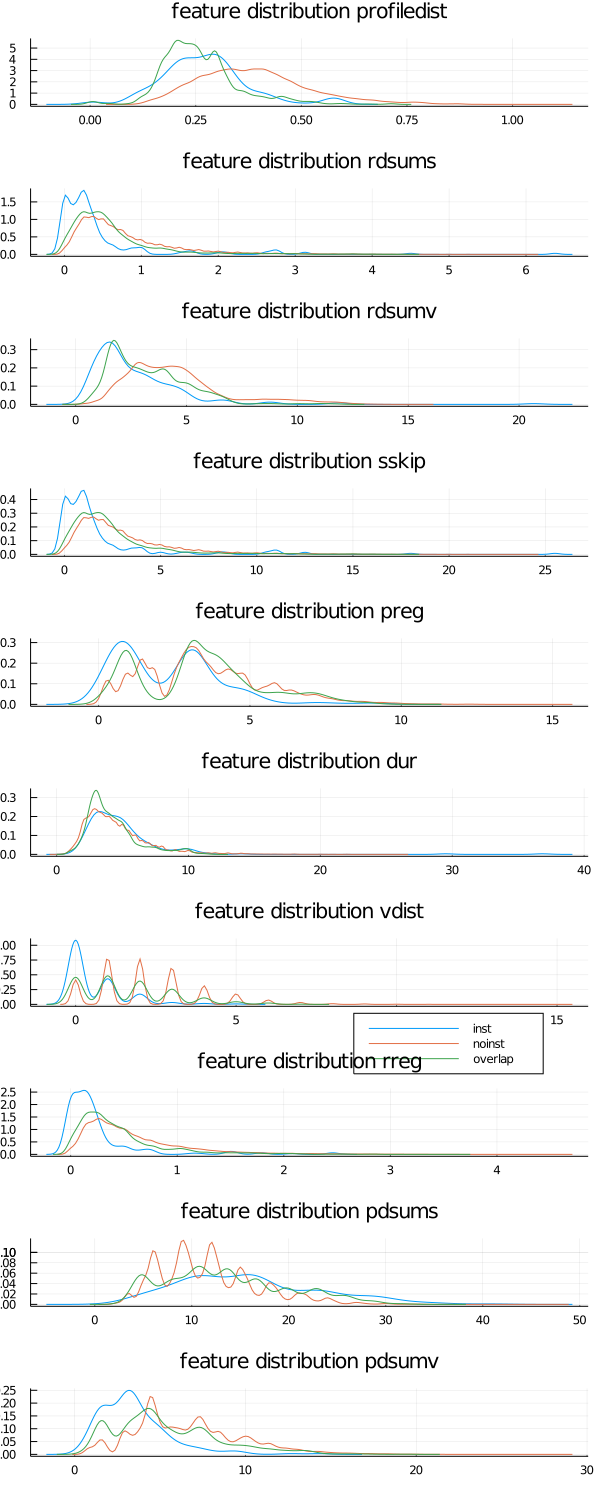

In [34]:
featcols = [:profiledist, keys(feats)...]
plotfeatures(df, featcols)

In [35]:
dfu = upsample(df);
dfd = downsample(df);

model = fitmodel(df, featcols);
modelu = fitmodel(dfu, featcols);
modeld = fitmodel(dfd, featcols);

dfa = addpredictions(df, model);
dfa = addpredictions(dfu, modelu);
dfa = addpredictions(dfd, modeld);

form = isinstance ~ profiledist + rdsums + rdsumv + sskip + preg + dur + vdist + rreg + pdsums + pdsumv
form = isinstance ~ profiledist + rdsums + rdsumv + sskip + preg + dur + vdist + rreg + pdsums + pdsumv
form = isinstance ~ profiledist + rdsums + rdsumv + sskip + preg + dur + vdist + rreg + pdsums + pdsumv


In [38]:
showeval(dfa)
println("")
showeval(dfu)
println("")
showeval(dfd)

confusion matrix:
true positives:  200
true negatives:  193
false positives: 29
false negatives: 22

accuracy:	0.8851351351351351
precision:	0.8733624454148472
recall:		0.9009009009009009
f1-score:	0.886917960088692
MCC:		0.7706534718254636



ArgumentError: ArgumentError: column name :predbool not found in the data frame